##### Import relevant libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#### Read the files


In [2]:
stations = pd.read_csv('station.csv')
trips = pd.read_csv('trip.csv')

In [3]:
stations.head(1)

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013


In [4]:
trips.head(1)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127


In [5]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
id                   70 non-null int64
name                 70 non-null object
lat                  70 non-null float64
long                 70 non-null float64
dock_count           70 non-null int64
city                 70 non-null object
installation_date    70 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ KB


In [6]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669959 entries, 0 to 669958
Data columns (total 11 columns):
id                    669959 non-null int64
duration              669959 non-null int64
start_date            669959 non-null object
start_station_name    669959 non-null object
start_station_id      669959 non-null int64
end_date              669959 non-null object
end_station_name      669959 non-null object
end_station_id        669959 non-null int64
bike_id               669959 non-null int64
subscription_type     669959 non-null object
zip_code              663340 non-null object
dtypes: int64(5), object(6)
memory usage: 56.2+ MB


#### Preprocess the datasets

In [7]:
def total_trips():
    
        """ converts start and end date to pandas datetime object
         generates a day indicator (0 to 5) column
         generates a week/weekday indicator column
         output : total_trips dataframe"""
    
        # to datetime object
        trips['start_date'] = pd.to_datetime(trips['start_date'])
        trips['end_date'] = pd.to_datetime(trips['end_date']) 
    
        # day indicator column
        trips['day_week'] = trips['start_date'].dt.weekday
    
        # week/weekend indicator column
        week_indicator=[]
    
        for value in range(0,len(trips['duration'])):
            if trips.iloc[value]['day_week']<5:
                 week_indicator.append('week')
            else:
                week_indicator.append('weekend')   
        
        trips['week_indicator']= week_indicator
        
        # generate month indicator
        
        trips['Month'] = trips['start_date'].dt.month
        
        # generate hour indicator
        
        trips['Hour'] = trips['start_date'].dt.hour
        
        # generate column with duration in minutes
        
        trips['Duration_Minutes'] = trips['duration']/60
    
        return trips
        
        

In [8]:
total_trips = total_trips()

In [9]:
total_trips.head(1)   

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_week,week_indicator,Month,Hour,Duration_Minutes
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,3,week,8,14,1.05


### Visualize distribution of Trips Duration

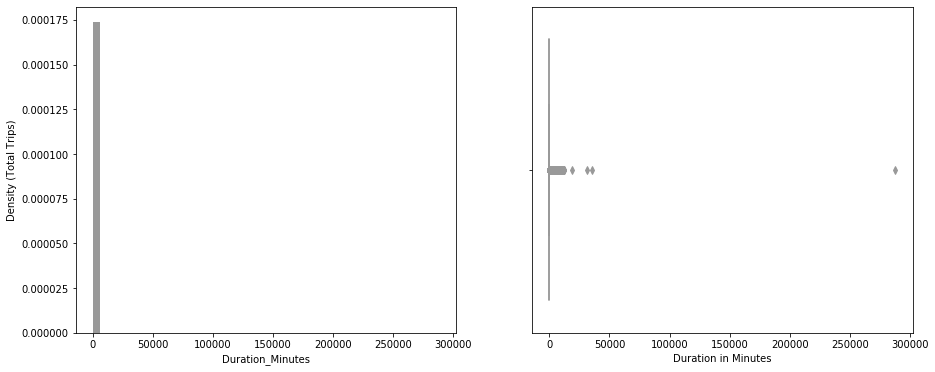

In [10]:
fig, ax= plt.subplots(1,2,figsize=[15,6])

sns.distplot(total_trips['Duration_Minutes'], kde=True, color=(0.0, 0.0, 0.0, 0.0),ax=ax[0])
ax[0].set_ylabel('Density (Total Trips)')
sns.boxplot(total_trips['Duration_Minutes'], ax=ax[1], color='white')
ax[1].set_xlabel('Duration in Minutes')

plt.savefig('Distribution_duration.png')

plt.show()

##### The distribution is very skewed due to a few outliers. It makes sense to cap it in order to better visualize it

In [11]:
print(total_trips['Duration_Minutes'].max())
print(total_trips['Duration_Minutes'].mean())
print(total_trips['Duration_Minutes'].median())

287840.0
18.46583076974363
8.616666666666667


##### Define capped dataframe and generate two separate series for weekend and weekday

In [12]:
total_trips_capped = total_trips[total_trips['duration']<5000]

total_trips_capped_WD = total_trips_capped[total_trips_capped['week_indicator']=='week']

total_trips_capped_WE = total_trips_capped[total_trips_capped['week_indicator']=='weekend']


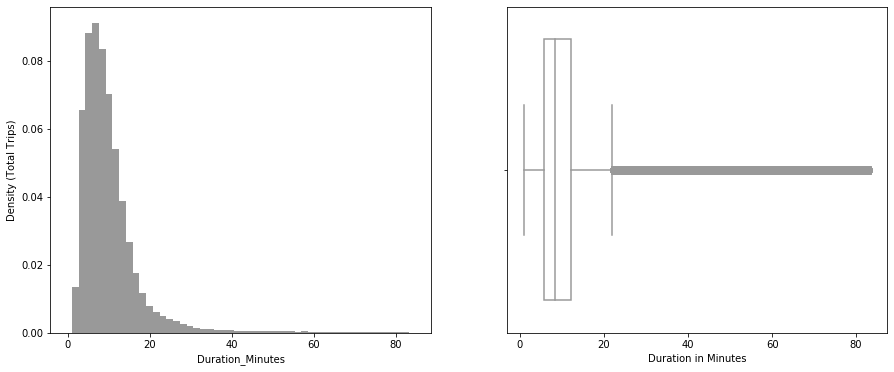

In [195]:
# reexamine distribution

fig, ax= plt.subplots(1,2,figsize=[15,6])

sns.distplot(total_trips_capped['Duration_Minutes'], kde=True, color=(0.0, 0.0, 0.0, 0.0),ax=ax[0])
ax[0].set_ylabel('Density (Total Trips)')
sns.boxplot(total_trips_capped['Duration_Minutes'], ax=ax[1], color='white')
ax[1].set_xlabel('Duration in Minutes')

plt.savefig('Distribution_duration.png')

plt.show()

### Visualize distribution of activity per day of the week, for customers and subscribers

In [15]:
# Define some helper functions for graphs and variables for the graphs

def plotb(x,y,data,ax):
    
    g=sns.barplot(x=x, y=y, hue='subscription_type', data=data,palette={'Customer':(0.9, 0.0, 0.0), 'Subscriber':(0.0, 0.9, 0.0)}, ax=ax)
    return g



In [16]:
total_trips_capped_day = total_trips_capped.groupby(['subscription_type']).agg(Number_of_Trips=('day_week','value_counts'))

In [17]:
total_trips_capped_day.reset_index(inplace=True)

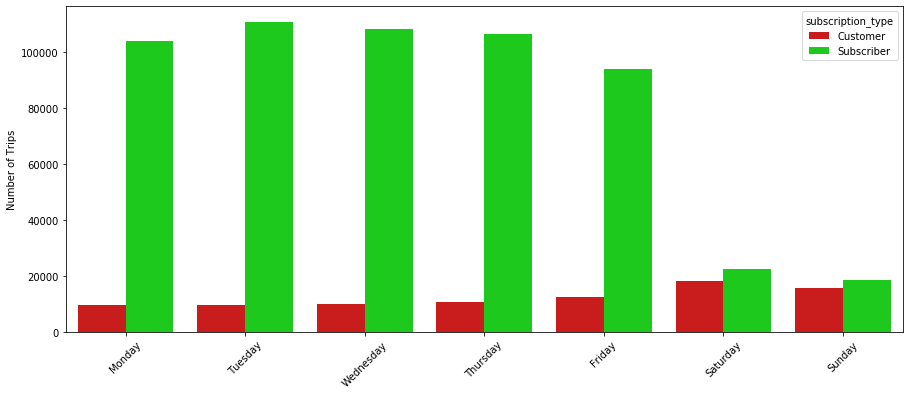

In [18]:
x=total_trips_capped_day['day_week']
y=total_trips_capped_day['Number_of_Trips']
palette={'Customer':(0.9, 0.0, 0.0), 'Subscriber':(0.0, 0.9, 0.0)}

fig= plt.figure(figsize=[15,6])
ax=sns.barplot(x=x,y=y,hue='subscription_type',palette=palette, data=total_trips_capped_day)
ax.set_xlabel((''))
ax.set_ylabel('Number of Trips')
ax.set_xticklabels(labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation=45)
plt.savefig('Distribution_trips_perDay.png')
plt.show()

### Visualize distribution of activity per month, for customers and subscribers

In [19]:
# aggregate for the weekday series

total_trips_capped_WD_month = total_trips_capped_WD.groupby(['subscription_type']).agg(Number_of_Trips=('Month','value_counts'))

In [20]:
total_trips_capped_WD_month.reset_index(inplace=True)
total_trips_capped_WD_month.head(1)

,subscription_type,Month,Number_of_Trips
0,Customer,9,7354


In [21]:
# aggregate for weekend series

total_trips_capped_WE_month = total_trips_capped_WE.groupby(['subscription_type']).agg(Number_of_Trips=('Month','value_counts'))

total_trips_capped_WE_month.reset_index(inplace=True)
total_trips_capped_WE_month.head(1)

,subscription_type,Month,Number_of_Trips
0,Customer,9,4443


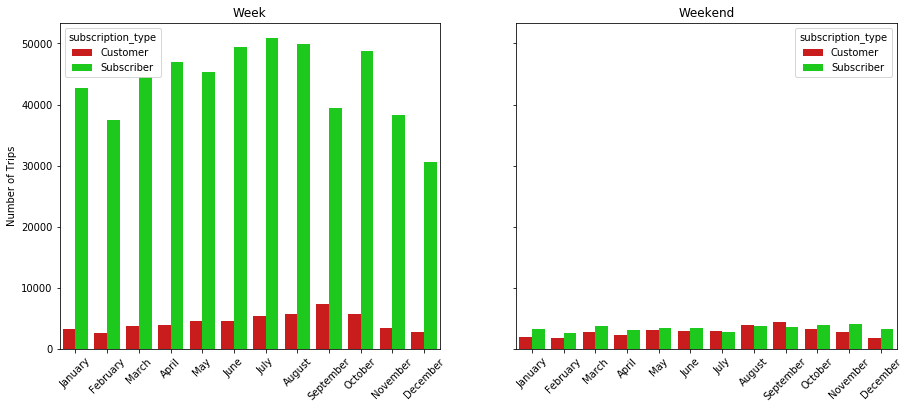

In [22]:
fig, ax = plt.subplots(1,2,sharex=True, sharey=True, figsize=[15,6])
plotb(x='Month', y='Number_of_Trips',data=total_trips_capped_WD_month,ax=ax[0])
plotb(x='Month', y='Number_of_Trips',data=total_trips_capped_WE_month,ax=ax[1])
ax[0].set_xlabel((''))
ax[0].set_ylabel('Number of Trips')
ax[0].set_xticklabels(labels=['January','February','March','April','May','June','July','August','September','October',
'November','December'], rotation=45)
ax[0].set_title('Week')
ax[1].set_xlabel((''))
ax[1].set_ylabel((''))
ax[1].set_xticklabels(labels=['January','February','March','April','May','June','July','August','September','October',
'November','December'], rotation=45)
ax[1].set_title('Weekend')
plt.savefig('trips per month.png')
plt.show()

### Visualize distribution of activity per hour, for customers and subscribers

In [23]:
# aggregate for the weekday series

total_trips_capped_WD_hour = total_trips_capped_WD.groupby(['subscription_type']).agg(Number_of_Trips=('Hour','value_counts'))

In [24]:
total_trips_capped_WD_hour.reset_index(inplace=True)
total_trips_capped_WD_hour.head(1)

,subscription_type,Hour,Number_of_Trips
0,Customer,17,5067


In [25]:
# aggregate for the weekend series

total_trips_capped_WE_hour = total_trips_capped_WE.groupby(['subscription_type']).agg(Number_of_Trips=('Hour','value_counts'))

In [26]:
total_trips_capped_WE_hour.reset_index(inplace=True)
total_trips_capped_WE_hour.head(1)

,subscription_type,Hour,Number_of_Trips
0,Customer,13,3592


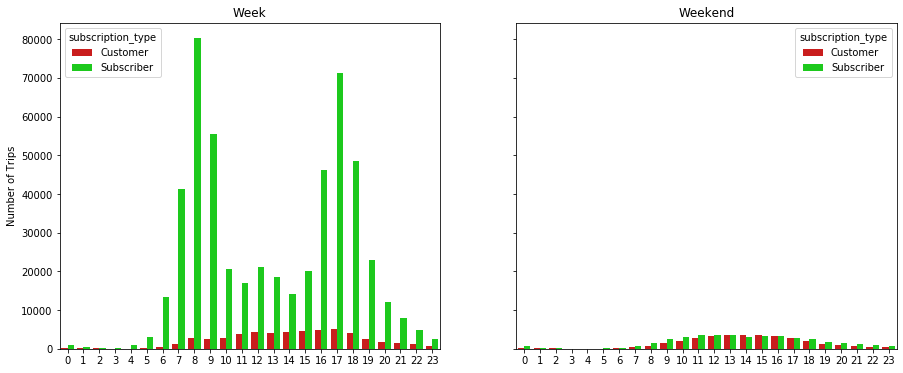

In [27]:
fig, ax = plt.subplots(1,2,sharex=True, sharey=True, figsize=[15,6])
plotb(x='Hour', y='Number_of_Trips',data=total_trips_capped_WD_hour,ax=ax[0])
plotb(x='Hour', y='Number_of_Trips',data=total_trips_capped_WE_hour,ax=ax[1])
ax[0].set_xlabel((''))
ax[0].set_ylabel('Number of Trips')

ax[0].set_title('Week')
ax[1].set_xlabel((''))
ax[1].set_ylabel((''))

ax[1].set_title('Weekend')
plt.savefig('trips per month.png')
plt.show()

### Merge the data in station.csv with the trips data for the week and weekend time series

In [46]:
total_trips_capped_WD.head(1)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_week,week_indicator,Month,Hour,Duration_Minutes
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,3,week,8,14,1.05


In [47]:
stations.head(1)

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013


In [48]:
merge_WD = pd.merge(total_trips_capped_WD, stations, left_on='start_station_id', right_on='id', how='inner')

In [49]:
merge_WD.head(1)

,id_x,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,...,Month,Hour,Duration_Minutes,id_y,name,lat,long,dock_count,city,installation_date
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,...,8,14,1.05,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013


In [57]:
merge_WE = pd.merge(total_trips_capped_WE, stations, left_on='start_station_id', right_on='id', how='inner')

### Visualize total trips per city and week/weekend

In [59]:
merge_WD_groupedbyCity = merge_WD.groupby(['subscription_type']).agg(Number_of_Trips=('city','value_counts'))

In [61]:
merge_WD_groupedbyCity.head(1)

,,Number_of_Trips
subscription_type,city,
Customer,San Francisco,47610


In [62]:
merge_WD_groupedbyCity.reset_index(inplace=True)

In [35]:
merge_WE_groupedbyCity = merge_WE.groupby(['subscription_type']).agg(Number_of_Trips=('city','value_counts'))

In [36]:
merge_WE_groupedbyCity.reset_index(inplace=True)

In [37]:
merge_WE_groupedbyCity.head(1)

,subscription_type,city,Number_of_Trips
0,Customer,San Francisco,30102


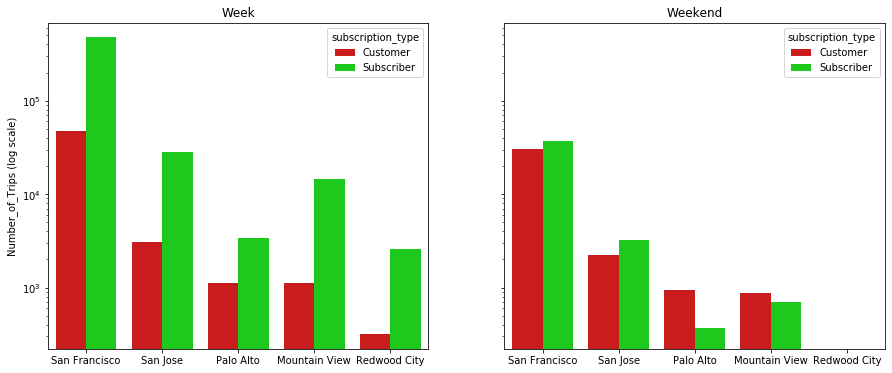

In [38]:
fig,ax=plt.subplots(1,2, sharex=True, sharey=True, figsize=[15,6])
plotb(x='city',y='Number_of_Trips', data=merge_WD_groupedbyCity,ax=ax[0])
plotb(x='city',y='Number_of_Trips', data=merge_WE_groupedbyCity,ax=ax[1])
ax[0].set_ylabel('Number_of_Trips (log scale)')
ax[0].set_xlabel((''))
ax[0].set_yscale('log')
ax[0].set_title('Week')
ax[1].set_title('Weekend')
ax[1].set_xlabel((''))
ax[1].set_ylabel((''))
ax[1].set_yscale('log')
plt.savefig('cities')

plt.show()

### Visualize activity within the cities using heatmaps

##### San Francisco

In [39]:
## weekday san francisco

merged_sf_WD = merge_WD[merge_WD['city']=='San Francisco']

merged_sf_WD_grouped=merged_sf_WD.groupby(by=['name'],).agg(Number_of_Trips=('subscription_type','value_counts'))

merged_sf_WD_grouped=merged_sf_WD_grouped.unstack(['subscription_type'])


In [40]:
merged_sf_WD_grouped.head(1)

Number_of_Trips           
subscription_type        Customer Subscriber
name                                        
2nd at Folsom                 711      13860

In [41]:
## weekend san francisco

merged_sf_WE = merge_WE[merge_WE['city']=='San Francisco']

merged_sf_WE_grouped=merged_sf_WE.groupby(by=['name']).agg(Number_of_Trips=('subscription_type','value_counts'))

merged_sf_WE_grouped=merged_sf_WE_grouped.unstack(['subscription_type'])

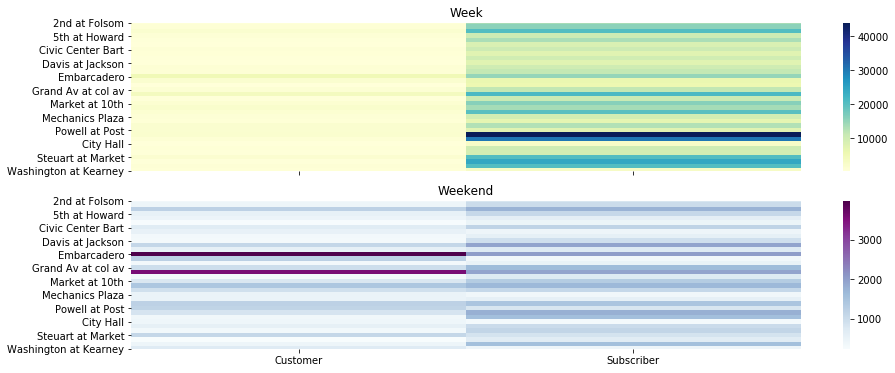

In [100]:
## san francisco weekday/weekend heatmap showing use of stations,customer and subscriber

fig, ax= plt.subplots(2,1, figsize=[15,6])

sns.heatmap(merged_sf_WD_grouped, ax=ax[0],cmap="YlGnBu")
ax[0].set_ylabel((''))
ax[0].set_xlabel((''))
ax[0].xaxis.set_ticklabels([])
ax[0].set_title('Week')
ax[0].set_yticklabels(labels=['2nd at Folsom','5th at Howard','Civic Center Bart','Davis at Jackson','Embarcadero','Grand Av at col av','Market at 10th','Mechanics Plaza','Powell at Post','City Hall','Steuart at Market','Washington at Kearney'])

sns.heatmap(merged_sf_WE_grouped, ax=ax[1],cmap="BuPu")
ax[1].set_ylabel((''))
ax[1].set_xlabel((''))
ax[1].xaxis.set_ticklabels(['Customer','Subscriber'])
ax[1].set_title('Weekend')
ax[1].set_yticklabels(labels=['2nd at Folsom','5th at Howard','Civic Center Bart','Davis at Jackson','Embarcadero','Grand Av at col av','Market at 10th','Mechanics Plaza','Powell at Post','City Hall','Steuart at Market','Washington at Kearney'])

plt.savefig('heatmap_sanfrancisco')

plt.show()

### Visualize distribution of distances    

In [101]:
# We would like to examine the distribution of the distances that the riders cover. We will
# define the distance as the linear distance between departure station and arrival station

In [156]:
total_trips_capped.head(1)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_week,week_indicator,Month,Hour,Duration_Minutes
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,3,week,8,14,1.05


In [163]:
## generate a dataframe with latitudes and longitudes for starting and ending points

def lat_long():
    
    # merge_1 in order to get starting lat and lon
    merge_1 = pd.merge(total_trips_capped, stations, left_on='start_station_id', right_on='id', how='inner')
    
    # rename columns
    merge_1.rename(columns={'lat':'lat_start','long':'lon_start'},inplace=True)
    
    # keep only necessary columns
    merge_1 = merge_1[['lat_start','lon_start','end_station_id']]
    
    # merge_2 in order to get ending lat and lon
    merge_2 =pd.merge(merge_1, stations, left_on='end_station_id',right_on='id', how='inner')
    
    # rename columns
    merge_2.rename(columns={'lat':'lat_end','long':'lon_end'}, inplace=True)
    
    # keep only necessary columns
    merge_2 = merge_2[['lat_start','lon_start','lat_end','lon_end']]
    
    return merge_2   

In [164]:
merge_2 = lat_long()

In [165]:
merge_2.head(1)

,lat_start,lon_start,lat_end,lon_end
0,37.774814,-122.418954,37.774814,-122.418954


In [173]:
## Loop to calculate distances:

from math import sin, cos, sqrt, atan2, radians

distance=[]

for value in range(0,len(merge_2.index)):

        # approximate radius of earth in km
        R = 6373.0

        lat1 = radians(merge_2['lat_start'][value])
        lon1 = radians(merge_2['lon_start'][value])
        lat2 = radians(merge_2['lat_end'][value])
        lon2 = radians(merge_2['lon_end'][value])

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        dist = R * c
        
        distance.append(dist)   

In [183]:
# Filter out values of 0 distance as they represent same starting and ending station

distance_filtered = list(filter(lambda x: x != 0, distance))

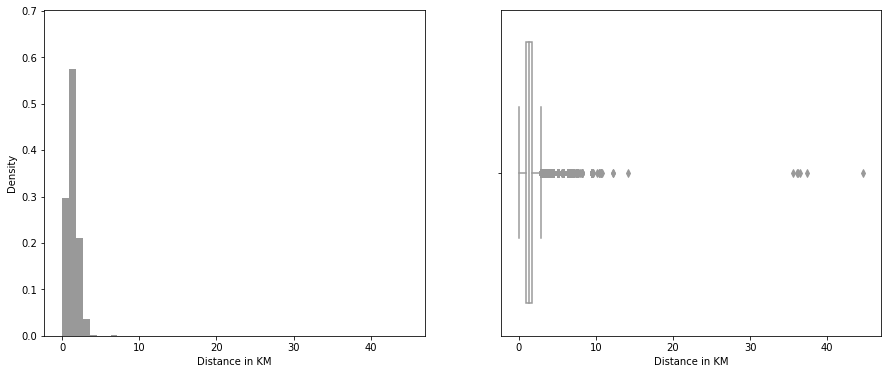

In [205]:
## Distribution of trips distances (estimated as distance between departing and ending station)

fig,ax = plt.subplots(1,2,sharex=True,figsize=[15,6])

sns.distplot(distance_filtered, kde=True, ax=ax[0], color=(0.0, 0.0, 0.0, 0.0))
sns.boxplot(distance_filtered, ax=ax[1], color='white')
ax[0].set_xlabel('Distance in KM')
ax[0].set_ylabel('Density')
ax[1].set_xlabel('Distance in KM')


plt.savefig('distance_km.png')
plt.show()


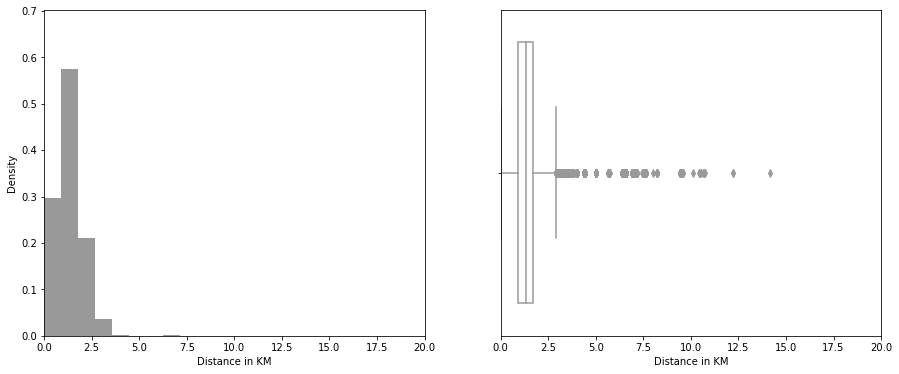

In [204]:
## Distribution of trips distances (estimated as distance between departing and ending station)
## Capped at 20 km

fig,ax = plt.subplots(1,2,sharex=True,figsize=[15,6])

sns.distplot(distance_filtered, kde=True, ax=ax[0], color=(0.0, 0.0, 0.0, 0.0))
sns.boxplot(distance_filtered, ax=ax[1], color='white')
ax[0].set_xlabel('Distance in KM')
ax[0].set_xlim(0,20)
ax[0].set_ylabel('Density')
ax[1].set_xlabel('Distance in KM')


plt.savefig('distance_20km.png')
plt.show()